<a href="https://colab.research.google.com/github/PTC-Education/PTC-API-Playground/blob/main/Onshape_API_Snippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. READ ME - Onshape API Snippets Overview
This snippets library is split into numbered sections to help you get started with interacting with Onshape's REST API using their [Python Client](https://github.com/onshape-public/onshape-clients/tree/master/python). 

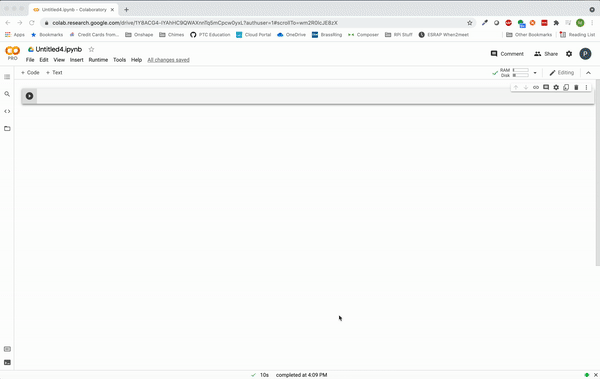


***Start by using snippets 0.1 and either 0.2 or 0.3*** to import the client and configuring you connection with API Keys generated in [Onshape's Dev Portal](https://dev-portal.onshape.com/). You can connect the snippets to your Onshape document by editing the "did", "eid", and "wid" from the URL of your Onshape document following the pattern https://cad.onshape.com/documents/'did'/w/'wid'/e/'eid'. Snippets are organized by API endpoints below.
00. Connect (start here)
01. PartStudios
02. Parts
03. MetaData
04. FeatureStudios
05. Elements
06. AppElements
07. Assemblies
08. Thumbnails

All "GET" snippets reference [this public Onshape document](https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/d316bcbc694c9dbb6555f340). The default parameters for the did, wid, and eid will only work for "GET" requests because your API keys will not be able to edit the public document with a "POST" request.

# 0.1 Connect - Import Python Client
This snippet shows how to install the [python-client from Onshape](https://github.com/onshape-public/onshape-clients/tree/master/python)

In [ ]:
!pip install onshape-client
from onshape_client.client import Client
import json
base = 'https://cad.onshape.com' # change this if you're using a document in an enterprise (i.e. "https://ptc.onshape.com")

# 0.2 Connect - Configure with API Keys in separate document (recommended)
This snippet shows how you can pull API keys from a document stored in your google drive. **Good for sharing a notebook but keeping your keys secret**. Run the first snippet to load files from drive, then upload a python file that includes your access and secret keys as strings to your drive (can upload from Colab with the folder icon on the left menu).

The colabkeys.py file should look something like the following (below are fake keys - replace with your own from [dev-portal.onshape.com](https://dev-portal.onshape.com/)):
```
access = 'Z97asb1257FkEwzp3EmCpa'
secret = 'nHwN3q7asdvg4aryFC9rxYyo9U4o415WokYa8VOQ9YfUh4Zx'
```


In [ ]:
import os
def include(filename):
    if os.path.exists(filename): 
        execfile(filename)
include('colabkeys.py')
client = Client(configuration={"base_url": base,
                               "access_key": access,
                               "secret_key": secret})

If your "colabkeys.py" file is saved in your google drive, you'll need to run the code cell below to allow Colab to access drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 0.3 Connect - Configure with API Keys in snippet
**Never share a notebook with your API Keys written in them.** Set the configuration with app keys generated from [the developer portal](https://dev-portal.onshape.com/). Replace the 'access-key-here' and 'secret-key-here' strings with your credentials. 

In [ ]:
client = Client(configuration={"base_url": base,
                               "access_key": 'access-key-here',
                               "secret_key": 'secret-key-here'})

# 1.1 PartStudios - GET Mass Properties
For certain API endpoints, you must pass specific endpoints. For this example, you need to provide the element id of a part studio to get the mass properties for the parts in that part studio.

In [ ]:
fixed_url = '/api/partstudios/d/did/w/wid/e/eid/massproperties'

# https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/d316bcbc694c9dbb6555f340
did = '263517311c2ad139d4eb57ca'
wid = 'b45057ae06777e0c28bca6c5'
eid = 'd316bcbc694c9dbb6555f340'

method = 'GET'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

# The command below prints the entire JSON response from Onshape
print(response.data)

fullResponse = json.loads(response.data)


# 1.1.1 PartStudios - Get Mass Properties and Calculate Density
Sample of using the mass properties endpoint to get information and do calculations on the data. Sample document here: https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/d316bcbc694c9dbb6555f340

In [ ]:
fixed_url = '/api/partstudios/d/did/w/wid/e/eid/massproperties'

# https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/d316bcbc694c9dbb6555f340
did = '263517311c2ad139d4eb57ca'
wid = 'b45057ae06777e0c28bca6c5'
eid = 'd316bcbc694c9dbb6555f340'

method = 'GET'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

# The command below prints the entire JSON response from Onshape
print(json.loads(response.data))
# parse json to get mass and volume for all parts in the document
volume = json.loads(response.data)['bodies']['-all-']['volume'][0] # three element array is volume, max volume, and minimum volume
mass = json.loads(response.data)['bodies']['-all-']['mass'][0] # three element array is mass, maximum mass, and minimum mass

# calculate density with mass and volume in kg/m^3
density = mass/volume
print(density)

# 1.1.2 PartStudios - Get Mass Properties from Configured Part
In this example, the document has configuration variables set up to drive parameters of the geometry. We change the "querry parameters" of the request to get the mass property for the different values.

In [ ]:
fixed_url = '/api/partstudios/d/did/w/wid/e/eid/massproperties'

# https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/d316bcbc694c9dbb6555f340
did = '263517311c2ad139d4eb57ca'
wid = 'b45057ae06777e0c28bca6c5'
eid = 'd316bcbc694c9dbb6555f340'

method = 'GET'

# add configureation to the params of the request
params = {'configuration': 'Length%3D0.2%2Bmeter'}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

# The command below prints the entire JSON response from Onshape
print(json.loads(response.data))

# 1.1.3 PartStudios - Get Mass Prop for series of configurations and plot

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fixed_url = '/api/partstudios/d/did/w/wid/e/eid/massproperties'

# https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/d316bcbc694c9dbb6555f340
did = '263517311c2ad139d4eb57ca'
wid = 'b45057ae06777e0c28bca6c5'
eid = 'd316bcbc694c9dbb6555f340'

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

method = 'GET'
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)
print(json.loads(response.data))
x = []
y = []

for i in range(1,5):
  x.append(i)
  configdef = 'Length%3D'+str(i)+'%2Bmeter'+';'+'Width%3D'+str(i)+'%2Bmeter'
  params = {'configuration': configdef}

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)
  massProp = json.loads(response.data)
  y.append(massProp['bodies']['-all-']['inertia'][0])

  # The command below prints the entire JSON response from Onshape
  print(massProp['bodies']['-all-']['inertia'][0])
plt.plot(x, y, 'o', color='black');


# 1.2 PartStudios - Make Part Studio
This is an example of a post request that creates a new part studio in an Onshape document.

In [ ]:
fixed_url = '/api/partstudios/d/did/w/wid'

did = '4bda16c648566259ea1b4e4c'
wid = 'c299b9fc994574c2637e871d'

method = 'POST'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

# The command below prints the entire JSON response from Onshape
print(json.loads(response.data))

# 1.3 PartStudios - Update Feature

First get the feature, then update the geometry, then send it back


In [ ]:
fixed_url = '/api/partstudios/d/did/w/wid/e/eid/features'

#https://cad.onshape.com/documents/bb1a0fa7536a74f282879c0a/w/107d615fca7419084dd2ddf3/e/1cb13d9abf5bab6bcb8e3668
did = 'bb1a0fa7536a74f282879c0a'
wid = '107d615fca7419084dd2ddf3'
eid = '872dc4906d7f740d74474a8c'

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

method = 'GET'
params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)
# print(json.loads(response.data)["features"][0]["message"]["entities"][0]["message"]["geometry"]["message"])

newFeature = json.loads(response.data)["features"][0]
newFeature["message"]["entities"][0]["message"]["geometry"]["message"]["radius"] = 0.01
print(newFeature["message"]["entities"][0]["message"]["geometry"]["message"])

print(json.loads(response.data)["sourceMicroversion"])
print(json.loads(response.data)["serializationVersion"])

fixed_url = '/api/partstudios/d/did/w/wid/e/eid/features/featureid/fid'

fid = json.loads(response.data)["features"][0]["message"]["featureId"]

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid, 1)
fixed_url = fixed_url.replace('fid', fid)

print(fixed_url)

method = 'POST'
params = {}
payload = {'feature': newFeature,
           'serializationVersion': json.loads(response.data)["serializationVersion"],
           'sourceMicroversion': json.loads(response.data)["sourceMicroversion"]}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

# 2.1 Parts - Get All Parts in Document
This snippet shows a sample of getting all of the parts in an Onshape document. 

In [ ]:
# The first part of the fixed URL specifies which API we're calling
fixed_url = '/api/parts/d/did/w/wid'

# https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/d316bcbc694c9dbb6555f340
did = '263517311c2ad139d4eb57ca'
wid = 'b45057ae06777e0c28bca6c5'

# Method below specifies the request type - 'GET' or 'POST'
method = 'GET'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

# The command below prints the entire JSON response from Onshape
# print(json.loads(response.data))

parts = json.loads(response.data)
for i in range(len(parts)):
  print(parts[i]["name"] +" has part ID: "+ parts[i]["partId"])

# 3.1 MetaData - Get Element MetaData

In [ ]:
fixed_url = '/api/metadata/d/did/w/wid/e/eid'

# https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/d316bcbc694c9dbb6555f340
did = '263517311c2ad139d4eb57ca'
wid = 'b45057ae06777e0c28bca6c5'
eid = 'd316bcbc694c9dbb6555f340'

method = 'GET'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

# The command below prints the entire JSON response from Onshape
for i in json.loads(response.data)['properties']:
  print(i['name'])
  print(i['value'])

# 3.2 MetaData - Get Part MetaData
You will need a Part ID for this API endpoint. You can get Part ID's with snippet 2.1 above.

In [ ]:
fixed_url = '/api/metadata/d/did/w/wid/e/eid/p/pid'

# https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/d316bcbc694c9dbb6555f340
did = '263517311c2ad139d4eb57ca'
wid = 'b45057ae06777e0c28bca6c5'
eid = 'd316bcbc694c9dbb6555f340'
pid = 'JHD'

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)
fixed_url = fixed_url.replace('pid', pid)

method = 'GET'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

for i in json.loads(response.data)['properties']:
  print(i['name'])
  print(i['value'])

# 3.2.1 MetaData - Update Part Color
The function below gets the metadata for a part, then changes the part's color and opacity, and sends a post request to update it. The function need a part id (pid) which can be found with the snippet in 2.4 above.

In [ ]:
def updateColor(eid,pid,newOpacity,newColors):

  fixed_url = '/api/metadata/d/did/w/wid/e/eid/p/pid'
  did = '4bda16c648566259ea1b4e4c'
  wid = 'c299b9fc994574c2637e871d'

  params = {}
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
            'Content-Type': 'application/json'}

  fixed_url = fixed_url.replace('did', did)
  fixed_url = fixed_url.replace('wid', wid)
  fixed_url = fixed_url.replace('eid', eid)
  fixed_url = fixed_url.replace('pid', pid)

  response = client.api_client.request('GET', url=base + fixed_url,
  query_params=params, headers=headers, body=payload)

  partMetaData = json.loads(response.data)
  partProperties = partMetaData['properties']

  # # Print current appearance values
  # for x in partProperties:
  #   if x['name'] == "Appearance":
  #     partAppearance = x
  #     break
  # print(partAppearance['value'])

  for i in range(len(partProperties)):
    if partProperties[i]['name'] == "Appearance":
      partProperties[i]['value']['opacity'] = newOpacity
      partProperties[i]['value']['color'] = newColors
      break

  partMetaData['properties'] = partProperties

  payload = partMetaData

  response = client.api_client.request('POST', url=base + fixed_url,
  query_params=params, headers=headers, body=payload)

In [ ]:
updateColor('7b5bc60e32e112ae487c32dc','JMD',150,{'red': 255, 'green': 1, 'blue': 1})

# 4.1 FeatureStudios - Create Feature Studio
First snippet creates a FeatureStudio

In [ ]:
fixed_url = '/api/featurestudios/d/did/w/wid'

did = 'e025dee9cd9e880498ecc623'
wid = '67f35e2ecb147b5d6c4e4498'

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)

method = 'POST'

params = {"name":"ColabFeature"}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

# The command below prints the entire JSON response from Onshape
print(json.loads(response.data))

# 4.2 FeatureStudios - Get FeatureSpecs
Element ID must be for a FeatureStudio

In [ ]:
fixed_url = '/api/featurestudios/d/did/w/wid/e/eid/featurespecs'

# https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/7a1ceda85403a0d972055ba7
did = '263517311c2ad139d4eb57ca'
wid = 'b45057ae06777e0c28bca6c5'
eid = '7a1ceda85403a0d972055ba7'

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

# Method below specifies the request type - 'GET' or 'POST'
method = 'GET'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)
print(response.data)

# 4.3 FeatureStudios - Get Feature Content

In [ ]:
fixed_url = '/api/featurestudios/d/did/w/wid/e/eid'

# https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/7a1ceda85403a0d972055ba7
did = '263517311c2ad139d4eb57ca'
wid = 'b45057ae06777e0c28bca6c5'
eid = '7a1ceda85403a0d972055ba7'

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

# Method below specifies the request type - 'GET' or 'POST'
method = 'GET'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)
print(response.data)

# 4.4 FeatureStudios - Update Feature Content


In [ ]:
fixed_url = '/api/featurestudios/d/did/w/wid/e/eid'

did = 'e025dee9cd9e880498ecc623'
wid = '67f35e2ecb147b5d6c4e4498'
eid = '7e843682a5c2ec5c8a0bb1af'

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

# Method below specifies the request type - 'GET' or 'POST'
method = 'GET'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

newBody = json.loads(response.data)
print(newBody["contents"]) #print current contents of featurestudio

#define new feature here
feature = """
FeatureScript 1511;
import(path : "onshape/std/geometry.fs", version : "1511.0");

annotation { "Feature Type Name" : "My Feature" }
export const myFeature = defineFeature(function(context is Context, id is Id, definition is map)
    precondition
    {
        // Define the parameters of the feature type
    }
    {
        // Define the function's action
        fCuboid(context, id + "cuboid1", {
                "corner1" : vector(0, 0, 0) * inch,
                "corner2" : vector(1, 1, 1) * inch
        });
    });
"""
newBody["contents"] = feature
payload = newBody

method = 'POST'
response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

# 5.1 Elements - Get Configurations

In [ ]:
fixed_url = '/api/elements/d/did/w/wid/e/eid/configuration'

# https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/d316bcbc694c9dbb6555f340
did = '263517311c2ad139d4eb57ca'
wid = 'b45057ae06777e0c28bca6c5'
eid = 'd316bcbc694c9dbb6555f340'

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

# Method below specifies the request type - 'GET' or 'POST'
method = 'GET'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)
ConfigInfo = json.loads(response.data)
ConfigParams = ConfigInfo["configurationParameters"]

for i in range(len(ConfigParams)):
  print(ConfigParams[i]["message"]["parameterName"])
  print(ConfigParams[i]["message"]["parameterId"])
  # print(ConfigParams[i]["message"]["rangeAndDefault"]["message"]) # useful info if configurations are variables
  

# 6.1 AppElements - Get JSON Tree Data

Element ID must be an application element

In [ ]:
fixed_url = '/api/appelements/d/did/w/wid/e/eid/content/json'

# https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/7f3248190c050b08d31db5f8
did = '263517311c2ad139d4eb57ca'
wid = 'b45057ae06777e0c28bca6c5'
eid = '7f3248190c050b08d31db5f8'

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

# Method below specifies the request type - 'GET' or 'POST'
method = 'GET'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)
print(response.data)

# 7.1 Assemblies - Get Assembly Definition

In [ ]:
fixed_url = '/api/assemblies/d/did/w/wid/e/eid'

# https://cad.onshape.com/documents/a1b859a8fa32ed77b6a98ef0/w/711d62fc0d00fce4a0289d79/e/494c89e6e3215f70111cd3c2
did = 'a1b859a8fa32ed77b6a98ef0'
wid = '711d62fc0d00fce4a0289d79'
eid = '494c89e6e3215f70111cd3c2'

method = 'GET'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

# The command below prints the entire JSON response from Onshape
print(json.loads(response.data))

# 7.2 Assemblies - Create Assembly Instance
The snippet below shows how to add all Parts from a Part Studio into an Assembly within the same document. If you want to pull a part from a different document, you must specify a versionID for the source document

In [ ]:
# Specify the document and element ID of the source part you want to insert
sourceDid = '062ac5b9f4d2e8b873653e76'
sourceEid = 'b508a03a28dd5add1fc6e5c0'

# Uncomment section below and use only if sourceDid is different than the assembly Did

# # First get the version of the document you want to pull from
# fixed_url = '/api/documents/d/did/versions'
# fixed_url = fixed_url.replace('did', sourceDid)

# method = 'GET'

# params = {}
# payload = {}
# headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
#            'Content-Type': 'application/json'}

# response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)
# version = json.loads(response.data)[0]['id']


# Then set up POST request to assembly you want to add to

fixed_url = '/api/assemblies/d/did/w/wid/e/eid/instances'

# Assembly you want to add instance to
# https://cad.onshape.com/documents/062ac5b9f4d2e8b873653e76/w/4c2c6371b76c676921ae8032/e/0a9a4d0604f036fd608e5120
did = '062ac5b9f4d2e8b873653e76'
wid = '4c2c6371b76c676921ae8032'
eid = '0a9a4d0604f036fd608e5120'

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

method = 'POST'

params = {}
payload = {'documentId': sourceDid,
           'elementId': sourceEid,
          #  'versionId':version, # only include versionID if source part is in a different document than the assembly
           'isWholePartStudio':True,
          #  'configuration':'MotorShape=Default' # must specify configuration if part is configured
           }

headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

print(response.status)

# 7.2.1 Assemblies - Create Instance from Assembly
This snippet shows how to add a sub-assembly from a linked document into a new assembly

In [ ]:
# First get the version of the document you want to pull from
fixed_url = '/api/documents/d/did/versions'
did = 'a1b859a8fa32ed77b6a98ef0'
fixed_url = fixed_url.replace('did', did)

method = 'GET'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)
version = json.loads(response.data)[0]['id']


# Then set up POST request to assembly you want to add to

fixed_url = '/api/assemblies/d/did/w/wid/e/eid/instances'

# Assembly you want to add instance to
# https://cad.onshape.com/documents/f20e3b39b4d19572ee26665d/w/26800f92770dbe88d66129fe/e/ff736ca1cb4b923812bf7f36
did = 'f20e3b39b4d19572ee26665d'
wid = '26800f92770dbe88d66129fe'
eid = 'ff736ca1cb4b923812bf7f36'

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

method = 'POST'

# specify the document ID and element ID for the assmelby you'd like to add
checkptDid = 'a1b859a8fa32ed77b6a98ef0'
checkptEid = '494c89e6e3215f70111cd3c2'

params = {}
payload = {'documentId': checkptDid,
           'elementId': checkptEid,
           'versionId':version,
           'isAssembly':True}

headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

print(response)

# 8.1 Thumbnails - Get document Thumbnails
The snippet below returns the URL of the png image with the document thumbnails

In [ ]:
fixed_url = '/api/thumbnails/d/did'

# https://cad.onshape.com/documents/263517311c2ad139d4eb57ca/w/b45057ae06777e0c28bca6c5/e/d316bcbc694c9dbb6555f340
did = '263517311c2ad139d4eb57ca'
wid = 'b45057ae06777e0c28bca6c5'
eid = 'd316bcbc694c9dbb6555f340'

method = 'GET'

params = {}
payload = {}
headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
           'Content-Type': 'application/json'}

fixed_url = fixed_url.replace('did', did)
fixed_url = fixed_url.replace('wid', wid)
fixed_url = fixed_url.replace('eid', eid)

response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

# The command below prints the entire JSON response from Onshape
print(response.data)

fullResponse = json.loads(response.data)